# 3.1 신경망의 구조

<img src ='https://tensorflowkorea.files.wordpress.com/2018/12/093.jpg'>


그림 : 네트워크, 층, 손실 함수, 옵티마이저 사이의 관계

### 3.1.1 층 : 딥러닝의 구성단위

1. 층
  - 하나 이상의 텐서를 입력으로 받아 하나 이상의 텐서를 출력하는 데이터 처리 모듈  
  - 대부분 가중치라는 층의 상태를 가진다. 가중치는 확률적 경사 하강법에 의해 학습되는 하나 이상의 텐서이며 여기에 네트워크가 학습한 지식이 담겨 있다.  
  - 층마다 적절한 텐서 포맷과 데이터 처리 방식이 다르다.
    - 밀집 연결 층(=완전 연결 층, 밀집 층) : (samples, features) 크기의 2D 텐서가 저장된 간단한 벡터 데이터를 처리  
    - 순환 층 : (samples, timesteps, features) 크기의 3D 텐서로 저장된 시퀀스 데이터를 처리  
    - 2D 합성곱 층 : 4D 텐서로 저장되어 있는 이미지 데이터 처리  

            
2. 층 호환성
  - 케라스에서는 호환 가능한 층들을 엮어 데이터 변환 파이프라인을 구성하여 딥러닝 모델을 만든다.  
  - 층 호환성이란 각 층이 특정 크기의 입력 텐서만 받고 특정 크기의 출력 텐서를 반환한다는 사실을 말한다.    

In [28]:
from keras import layers
from keras import models

layer = layers.Dense(32, input_shape=(784,)) # 32개의 유닛으로 된 밀집 층
                                            # 첫 번째 차원이 784인 2D 텐서만 입력으로 받는 층 생성
                                           # (배치 차원인 0번째 축은 지정하지 않기 때문에 어떤 배치 크기도 입력으로 받을 수 있다.)
                                          # 32차원의 벡터를 입력으로 받는 하위 층이 연결되어야 한다.

model = models.Sequential()
model.add(layers.Dense(32,input_shape=(784,)))
model.add(layers.Dense(10)) # 앞선 층의 출력 크기를 입력 크기로 자동으로 채택

### 3.1.2 모델 : 층의 네트워크

1. 자주 등장하는 네트워크 구조  
  - 가지(branch)가 2개인 네트워크  
  - 출력이 여러 개인 네트워크   
  - 인셉션(Inception) 블록  


2. 네트워크 구조를 선택함으로써 가능성 있는 공간(가설 공간)을 입력 데이터에서 출력 데이터로 매핑하는 일련의 특정 텐서 연산으로 제한하게 된다.  이런 텐서 연산에 포함된 가중치 텐서의 좋은 값을 찾아야 한다.

### 3.1.3 손실 함수와 옵티마이저 : 학습 과정을 조절하는 열쇠

1. 손실 함수(목적 함수) : 훈련하는 동안 최소화될 값이다. 주어진 문제애 대한 성공 지표가 된다.  
2. 옵티마이저 : 손실 함수를 기반으로 네트워크가 어떻게 업데이트될지 결정한다. 특정 종류의 확률적 경사 하강법을 구현한다.

# 3.4 영화 리뷰 분류 : 이진 분류 예제

- 리뷰 텍스트를 기반으로 영화 리뷰를 긍정과 부정으로 분류하는 방법

### 3.4.1 IMDB 데이터셋

- 훈련 데이터 2만 5,000개와 테스트 데이터 2만 5,000개로 나뉘어 있고, 각각 50%는 부정, 50%는 긍정 리뷰로 구성되어 있다. 같은 데이터에서 머신 러닝 모델을 훈련하고 테스트해서는 안 되기 때문에 데이터가 나뉘어 있다.  
- 중요한 것은 **새로운 데이터에 대한 모델의 성능**이다.

In [29]:
# IMDB 데이터셋 로드하기
from keras.datasets import imdb

# num_words = 100000 매개변수는 훈련 데이터에서 가장 자주 나타나는 단어 1만 개만 사용하겠다는 의미
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000) 

In [30]:
# train_data, test_data : 리뷰의 목록
# 리뷰는 단어 인덱스의 리스트
# train_labels, test_labels : 부정은 0, 긍정은 1

print(train_data[0])
print('train_labels[0] : ',train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
train_labels[0] :  1


In [5]:
# 가장 자주 등장하는 단어 1만 개로 제한했기 때문에 단어 인덱스는 10000을 넘지 않는다.
max([max(sequence) for sequence in train_data])

9999

In [14]:
# cf. 원래 영어단어로 어떻게 바꾸는지

word_index = imdb.get_word_index() # word_index는 단어와 정수 인덱스를 매핑한 딕셔너리이다
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()]) # 정수 인덱스와 단어를 매핑하도록 뒤집는다
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]]) # 리뷰를 디코딩한다. 0,1,2는 '패딩', '문서시작', '사전에 없음'을 위한 인덱스 이므로 3을 뺀다.
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

- 3을 뺀 값을 reverse_word_index 딕셔너리에서 찾지 못하기 때문에 물음표로 바뀌어 나타난다.
- dictionary(딕셔너리)  
(참고 : https://wikidocs.net/16043)

In [19]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [18]:
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

### 3.4.2 데이터 준비

신경망에 숫자 리스트를 주입할 수 없다. 리스트를 텐서로 바꾸는 두 가지 방법이 있다.  
1. 같은 길이가 되도록 리스트에 패딩(padding)을 추가하고 (samples, sequence_length) 크기의 정수 텐서로 변환한다. 그 다음 이 정수 텐서를 다룰 수 있는 층을 신경망의 첫 번째 층으로 사용한다.(Embedding 층)  


2. 리스트를 원-핫 인코딩(one-hot encoding)하여 0과 1의 벡터로 변환한다. 예를 들어 시퀀스 [3,5]를 인덱스 3과 5의 위치는 1이고 그 외는 모두 0인 10000 차원의 벡터로 각각 변환한다. 그 다음 부동 소수 벡터 데이터를 다룰 수 있는 Dense 층을 신경망의 첫 번째 층으로 사용한다.  

In [31]:
# 정수 시퀀스를 이진 행렬로 인코딩
# 2번째 방법인 원-핫 인코딩 이용

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension)) # 크기가 (len(sequences), dimension)이고 모든 원소가 0인 행렬을 만든다.
    for i, sequence in enumerate(sequences): 
        results[i,sequence] = 1. # results[i]에서 특정 인덱스의 위치를 1로 만든다.
    return results

x_train = vectorize_sequences(train_data) # 훈련 데이터를 벡터로 변환
x_test = vectorize_sequences(test_data) # 테스트 테이터를 벡터로 변환

- enumerate는 순서가 있는 자료형(list, set, tuple, dictionary, string)을 입력으로 받아 인덱스 값을 포함하는 enumerate 객체를 리턴한다.  
(참고 : https://wikidocs.net/20792)

In [24]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [16]:
# 레이블 -> 벡터로 변환
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [30]:
print(y_train)
print(y_test)

[1. 0. 0. ... 0. 1. 0.]
[0. 1. 1. ... 0. 0. 0.]


### 3.4.3 신경망 모델 만들기

입력 데이터가 벡터이고 레이블은 스칼라(1 또는 0)이다. 이런 문제에 잘 작동하는 네트워크 종류는 relu 활성화 함수를 사용한 완전 연결 층(즉, Dense(16, activation='relu'))을 그냥 쌓은 것이다.  


Dense 층에 전달한 매개변수(16)는 **<u>은닉 유닛(hidden unit)</u>**의 개수이다. 하나의 은닉 유닛은 층이 나타내는 표현 공간에서 하나의 차원이 된다. 2장에서 relu 활성화 함수를 사용한 Dense 층을 다음과 같은 텐서 연산을 연결하여 구현하였다:  


$$output = relu(dot(W, input) + b)$$



16개의 은닉 유닛이 있다는 것은 가중치 행렬 W의 크기가 (input_dimension, 16)이라는 뜻이다. 입력 데이터와 W를 점곱하면 입력 데이터가 16 차원으로 표현된 공간으로 투영된다(그리고 편향 벡터 b를 더하고 relu 연산을 적용한다). **<u>표현 공간의 차원을 '신경망이 내재된 표현을 학습할 때 가질 수 있는 자유도'</u>**로 이해할 수 있다. 은닉 유닛을 늘리면 (표현 공간을 더 고차원으로 만들면) 신경망이 더욱 복잡한 표현을 학습할 수 있지만, 계산 비용이 커지고 원치 않은 패턴을 학습할 수도 있다(훈련 데이터에서는 성능이 향상되지만 테스트 데이터에서는 그렇지 않은 패턴이다).  


Dense 층을 쌓을 때 다음과 같은 두 가지 중요한 구조상의 결정이 필요하다:  
- 얼마나 많은 층을 사용할 것인가  
- 각 층에 얼마나 많은 은닉 유닛을 둘 것인가  


중간에 있는 은닉 층은 활성화 함수로 relu를 사용하고 마지막 층은 확률(0과 1사이의 점수로, 어떤 샘플이 타깃 '1'일 가능성이 높다는 것은 그 리뷰가 긍정일 가능성이 높다는 것을 의미)을 출력하기 위해 시그모이드 함수를 사용한다.


<img src = 'https://tensorflowkorea.files.wordpress.com/2018/12/108.jpg'>  

<center>그림 relu 함수 : relu는 음수를 0으로 만드는 함수</center>

<img src = 'https://tensorflowkorea.files.wordpress.com/2018/12/109_1.jpg'>    

<center>그림 시그모이드(sigmoid)함수 : 시그모이드는 임의의 값을 [0,1] 사이로 압축하므로 출력 값을 확률처럼 해석 가능</center>  

<img src='https://tensorflowkorea.files.wordpress.com/2018/12/109_2.jpg?w=196&h=300'>
<center> 그림 3개의 층으로 된 신경망 </center>

In [32]:
# 모델 정의
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

**cf. 활성화 함수(비선형 함수)**  


relu와 같은 활성화 함수가 없다면 Dense 층은 선형적인 연산인 점곱과 덧셈 2개로 구성된다.  


$$output = dot(W,input)+b$$  


그러므로 이 층은 입력에 대한 선형 변환(아핀 변환)만을 학습할 수 있다. 이 층의 가설 공간은 입력 데이터를 16차원의 공간으로 바꾸는 가능한 모든 선형 변환의 집합이다. 이런 가설 공간은 매우 제약이 많으며, 선형 층을 깊게 쌓아도 여전히 하나의 선형 연산이기 때문에 층을 여러 개로 구성하는 장점이 없다.  
=> 즉, <u>선형함수로는 층을 추가해도 가설 공간이 확장되지 않는다.</u>


<u>가설 공간을 풍부하게 만들어 층을 깊게 만드는 장점을 살리기 위해 비선형성 또는 활성화 함수를 추가해야 한다.</u> relu는 딥러닝에서 가장 인기 있는 활성화 함수이다.  

**손실 함수와 옵티마이저 선택**  


- 이진 분류 문제고 신경망의 출력이 확률 => binary_crossentropy 손실이 적합  
    - mean_sqaured_error도 사용 가능(mean_squared_error와 mean_absolute_error는 회귀 문제에 사용되는 대표적인 손실 함수)  
- 확률을 출력하는 모델을 사용할 때에는 크로스엔트로피가 최선의 선택이다. 
    - 크로스엔트로피는 정보 이론 분야에서 온 개념으로 확률 분포 간의 차이를 측정한다. 여기서는 원본 분포와 예측 분포 사이를 측정한다.  

In [33]:
# 모델 컴파일
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


- 케라스에 rmsprop, binary_crossentropy, accuracy가 포함되어 있어 옵티마이저,  손실 함수, 측정 지표를 문자열로 지정하는 것이 가능하다.  
- 이따금 옵티마이저의 매개변수를 바꾸거나 자신만의 손실함수, 측정 함수를 전달해야 할 경우가 있다.(아래 참고)

In [34]:
# 옵티마이저 설정
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [35]:
# 손실과 측정을 함수 객체로 지정하기
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001), # 학습률
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

### 3.4.4 훈련 검증

훈련하는 동안 처음 본 데이터에 대한 모델의 정확도를 측정하기 위해선 원본 훈련 데이터에서 10,000의 샘플을 떼어 검증 세트를 만들어야 한다.  

In [36]:
# 검증 세트 준비
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [37]:
# 모델 훈련
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc']) # accuracy


history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val)) 

# 512개의 샘플씩 미니 배치를 만들어 20번의 에포크 동안 훈련(x_train, y_train 텐서에 있는 모든 샘플에 대해 20번 반복)
# validation_data 매개변수에 검증 데이터를 전달


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 8s 537us/step - loss: 0.5095 - acc: 0.7947 - val_loss: 0.3939 - val_acc: 0.8670
Epoch 2/20
15000/15000 [==============================] - 6s 385us/step - loss: 0.3167 - acc: 0.9035 - val_loss: 0.3149 - val_acc: 0.8861
Epoch 3/20
15000/15000 [==============================] - 6s 392us/step - loss: 0.2348 - acc: 0.9246 - val_loss: 0.2916 - val_acc: 0.8857
Epoch 4/20
15000/15000 [==============================] - 5s 360us/step - loss: 0.1882 - acc: 0.9399 - val_loss: 0.2733 - val_acc: 0.8930
Epoch 5/20
15000/15000 [==============================] - 5s 348us/step - loss: 0.1545 - acc: 0.9514 - val_loss: 0.2801 - val_acc: 0.8878
Epoch 6/20
15000/15000 [==============================] - 6s 388us/step - loss: 0.1265 - acc: 0.9627 - val_loss: 0.3043 - val_acc: 0.8812
Epoch 7/20
15000/15000 [==============================] - 5s 352us/step - loss: 0.1076 - acc: 0.9684 - val_loss: 0.3002 -

In [38]:
history_dict = history.history
history_dict.keys() # 이 딕셔너리는 훈련과 검증하는 동안 모니터링할 측정 지표당 하나씩 모두 4개의 항목을 담고 있다.

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

Keras에서는 모델 학습을 위해 fit() 함수를 사용한다. 이 때, 리턴값으로 학습 이력(History) 정보를 리턴한다. 여기에는 다음과 같은 항목들이 포함되어 있다.


아래 항목들은 매 epoch 마다의 값들이 저장되어 있다.


- loss : 훈련 손실값  
- acc : 훈련 정확도  
- val_loss : 검증 손실값  
- val_acc : 검증 정확도  


(참고: https://snowdeer.github.io/machine-learning/2018/01/11/keras-use-history-function/)

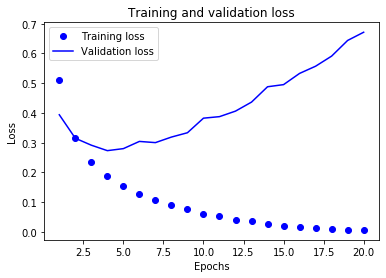

In [50]:
# 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss') #'bo'는 파란색 점
plt.plot(epochs, val_loss, 'b', label='Validation loss') # 'b'는 파란색 실선
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

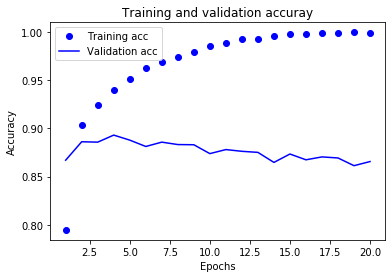

In [51]:
# 훈련과 검증 정확도 그리기
plt.clf() # 그래프 초기화
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuray')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

- 훈련 손실이 에포크마다 감소하고 훈련 정확도는 에포크마다 증가한다.  
- 그러나 검증 손실과 정확도는 이와 같지 않다. 네 번째 에포크에서 그래프가 역전되는 것 같다. 두 번째 에포크 이후부터 훈련 데이터에 과도하게 최적화되어 훈련 데이터에 특화된 표현을 학습하므로 훈련 세트 이외의 데이터에는 일반화되지 못한다.
  - 이런 경우 과대적합을 방지하기 위해 세 번째 에포크 이후에 훈련을 중지할 수 있다.

In [54]:
# 처음부터 다시 새로운 신경망을 네 번의 에포크 동안만 훈련하고 테스트 데이터에서 평가
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 7s 277us/step - loss: 0.4699 - accuracy: 0.8250
Epoch 2/4
25000/25000 [==============================] - 7s 284us/step - loss: 0.2635 - accuracy: 0.9079
Epoch 3/4
25000/25000 [==============================] - 6s 232us/step - loss: 0.2029 - accuracy: 0.9264
Epoch 4/4
25000/25000 [==============================] - 20s 782us/step


In [55]:
results # 87%의 정확도를 달성

[0.3097321525669098, 0.8773599863052368]

### 3.4.5 훈련된 모델로 새로운 데이터에 대해 예측하기

In [56]:
model.predict(x_test) # predict 메서드를 이용해 어떤 리뷰가 긍정일 확률을 예측할 수 있음
                     # 어떤 샘플에 대해선 확신이 있지만 아닌 것도 있음

array([[0.14273298],
       [0.99993783],
       [0.7247715 ],
       ...,
       [0.09151641],
       [0.06152463],
       [0.5309106 ]], dtype=float32)

- 이진 분류에서 레이블이 1인 경우 양성(positive) 샘플, 0인 경우를 음성(negative) 샘플이라고 한다. 이 예에서는 긍정(positivie)인 리뷰가 양성 샘플이지만 어떤 좋은 것이 양성 샘플이 되는 것이 아니고 <u>예측하려는 대상이 양성이 된다.</u> 예를 들어 암 진단에 관한 문제에서는 악성 종양이 양성 샘플이 된다.

### 3.4.6 추가 실험

- 여기에서는 두 개의 은닉층을 사용했다. 한 개 또는 세 개의 은닉층을 사용하고 검증과 테스트 정확도에 어떤 영향을 미치는지 확인해보기  
- 층의 은닉 유닛을 추가하거나 줄여 보기: 32개 유닛, 64개 유닛 등  
- binary_crossentropy 대신에 mse 손실 함수를 사용해 보기  
- relu 대신에 tanh 활성화 함수(초창기 신경망에서 인기 있었던 함수)를 사용해 보기

### 3.4.7 정리

- 원본 데이터를 신경망에 텐서로 주입하기 위해서는 꽤 많은 전처리가 필요하다. 단어 시퀀스는 이진 벡터로 인코딩될 수 있고 다른 인코딩 방식도 있다.  
- relu 활성화 함수와 함께 Dense 층을 쌓은 네트워크는 (감성 분류를 포함하여) 여러 종류의 문제에 적용할 수 있어 앞으로 자주 사용하게 될 것이다.  
- (출력 클래스가 2개인) 이진 분류 문제에서 네트워크는 하나의 유닛과 sigmoid 활성화 함수를 가진 Dense 층으로 끝나야 한다. 이 신경망의 출력은 확률을 나타내는 0과 1 사이의 스칼라 값이다.  
- 이진 분류 문제에서 이런 스칼라 시그모이드 출력에 대해 사용할 손실 함수는 binary_crossentropy이다.  
- rmsporp 옵티마이저는 문제에 상관없이 일반적으로 충분히 좋은 선택이다.  
- 훈련 데이터에 대해 성능이 향상됨에 따라 신경망은 과대적합되기 시작하고 이전에 본적 없는 데이터에서는 결과가 점점 나빠지게 된다. 항상 룬련 세트 이외의 데이터에서 성능을 모니터링해야 한다.